# Analyza Klicperova

Abych si usetril praci, tak vyuzivam prikazy ze:
* analyzy vetru - https://github.com/martin-majlis/ms-opendata-tools/blob/master/01-Analyza-Vetru.ipynb
* analyza skola Opavska - https://github.com/martin-majlis/ms-opendata-tools/blob/master/02-Opavska.ipynb
* simulace skoly - https://github.com/martin-majlis/ms-opendata-simulation/blob/master/Analysis.ipynb

In [1]:
# import balicku
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# nactu predpripravena data
data_raw = pd.read_csv('klicperova_sensor.csv')

In [3]:
# podivam se, jake sloupce jsou dostupne
data_raw.columns

Index(['TS', 'TS_H', '0004A30B001EE7CA-Battery', '0004A30B001EE7CA-Channel',
       '0004A30B001EE7CA-Humidity', '0004A30B001EE7CA-LrrRSSI',
       '0004A30B001EE7CA-LrrSNR', '0004A30B001EE7CA-Packet_type',
       '0004A30B001EE7CA-RSSI', '0004A30B001EE7CA-SNR',
       '0004A30B001EE7CA-SpFact', '0004A30B001EE7CA-SubBand',
       '0004A30B001EE7CA-Temperature', '0004A30B001EE7CA-Timestamp',
       '0004A30B001EE860-Battery', '0004A30B001EE860-Channel',
       '0004A30B001EE860-LrrRSSI', '0004A30B001EE860-LrrSNR',
       '0004A30B001EE860-Packet_type', '0004A30B001EE860-RSSI',
       '0004A30B001EE860-SNR', '0004A30B001EE860-Soil_Moisture',
       '0004A30B001EE860-SpFact', '0004A30B001EE860-SubBand',
       '0004A30B001EE860-Timestamp', '0004A30B001EFE2B-Battery',
       '0004A30B001EFE2B-Channel', '0004A30B001EFE2B-Illuminance',
       '0004A30B001EFE2B-LrrRSSI', '0004A30B001EFE2B-LrrSNR',
       '0004A30B001EFE2B-Packet_type', '0004A30B001EFE2B-RSSI',
       '0004A30B001EFE2B-SNR', '

In [4]:
# Ted si vyberu sloupecky, ktere vypadaji uzitecne
COLUMNS_KLICPEROVA = [
    'TS', 
    'TS_H',
    '0004A30B001EE7CA-Humidity',
    '0004A30B001EE7CA-Temperature',
    '0004A30B001EE860-Soil_Moisture',
    '0004A30B001EFE2B-Illuminance',
    '0004A30B001F1D16-Noise',
    '0004A30B001F384F-Illuminance',
    '0004A30B001F396D-Events_counter',
    '0004A30B001F396D-Magnet_status',   
]
data_klicperova = data_raw[COLUMNS_KLICPEROVA]
data_klicperova.describe()

,TS,0004A30B001EE7CA-Humidity,0004A30B001EE7CA-Temperature,0004A30B001EE860-Soil_Moisture,0004A30B001EFE2B-Illuminance,0004A30B001F1D16-Noise,0004A30B001F384F-Illuminance,0004A30B001F396D-Events_counter,0004A30B001F396D-Magnet_status
count,1.891000e+03,1823.000000,1823.000000,101.00000,1575.000000,1658.000000,792.000000,217.000000,217.000000
mean,1.510568e+09,14.850437,11.975851,0.00001,100.936571,36.062419,210.442298,1.907834,0.276498
std,5.083281e+05,11.688695,9.908010,0.00010,245.424156,7.153096,284.442286,2.054981,0.448300
min,1.509633e+09,1.763000,1.522000,0.00000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,1.510153e+09,3.263000,2.186000,0.00000,0.000000,30.000000,0.000000,1.000000,0.000000
50%,1.510578e+09,4.359000,2.512000,0.00000,0.000000,34.065000,33.800000,1.000000,0.000000
75%,1.511004e+09,26.090000,21.960000,0.00000,48.100000,40.420000,440.700000,2.000000,1.000000
max,1.511429e+09,32.280000,24.760000,0.00100,1796.900000,93.910000,1723.500000,16.000000,1.000000


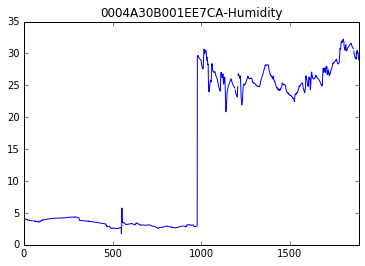

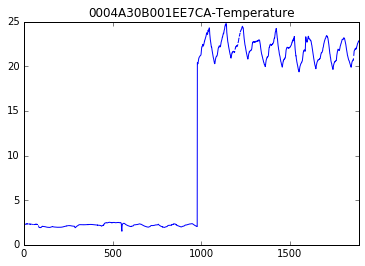

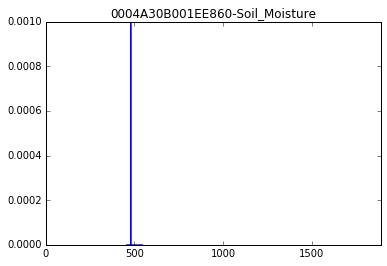

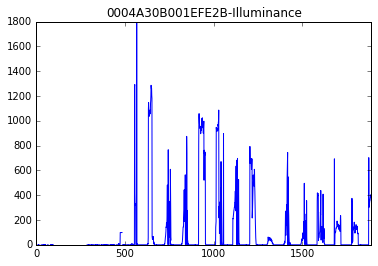

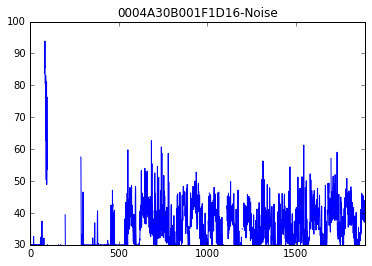

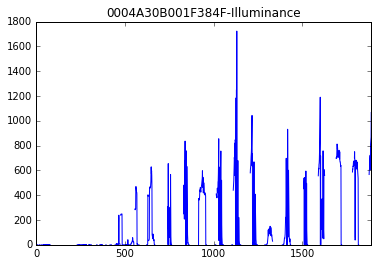

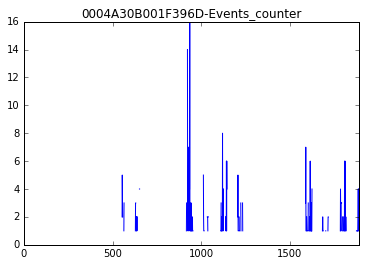

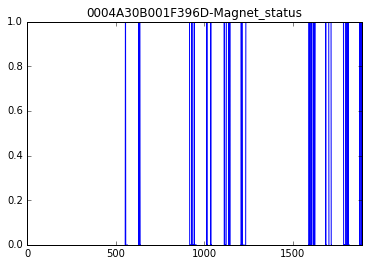

In [5]:
# Nebo muzu udelat smycku pro vsechny sloupecky
for col in COLUMNS_KLICPEROVA:
    if col in ['TS', 'TS_H']:
        continue
    data_klicperova[col].plot(title=col)
    plt.show()

In [6]:
# A ted se muzeme podivat s cim koreluje illuminace na jednom senzoru
data_klicperova.corr()['0004A30B001EFE2B-Illuminance'].sort_values()

0004A30B001EE7CA-Humidity         -0.065308
0004A30B001EE7CA-Temperature      -0.047872
TS                                -0.016285
0004A30B001F396D-Magnet_status     0.040458
0004A30B001F396D-Events_counter    0.242383
0004A30B001F1D16-Noise             0.267384
0004A30B001EE860-Soil_Moisture     0.316149
0004A30B001F384F-Illuminance       0.420141
0004A30B001EFE2B-Illuminance       1.000000
Name: 0004A30B001EFE2B-Illuminance, dtype: float64